In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from prototype_data import get_dataset
from prototype_runs import Experiment
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#from prototype_plots import Report, plot2D, transform_label, plot_elbow_curve
%run prototype_plots.py
from tqdm import tqdm, tqdm_notebook

normalizers = [False, MinMaxScaler]#, StandardScaler]

/mnt/Data/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Omniglot
### Omniglot validation

In [16]:
random_state=0
dataset = 'omniglot'
train_size = 100
N = n_classes = 10
random_state=0

dataset_obj = get_dataset(dataset, random_state)
X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
train, test = list(skf.split(X, y))[0]

In [2]:
out = []

for i, normalize in enumerate(normalizers):
    o = plot_elbow_curve(
        X[train], y[train], n_clusters=np.arange(5,51,5),
        cv=skf_cv, detailed_results=True,
        normalize=normalize, random_state=random_state,
        plot=False)
    out.append(o)
    np.savetxt('scores_val_%s_norm_%s.csv' % (dataset, bool(normalize)),
               o[1], delimiter=',')

/mnt/Data/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


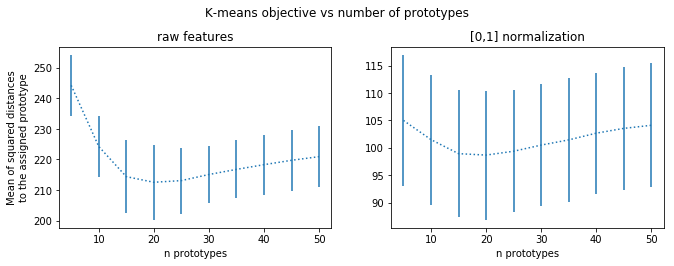

In [50]:
dataset='omniglot'
plt.figure(figsize=(10,4))
plt.suptitle('K-means objective vs number of prototypes')
plt.subplot(1,len(normalizers),1)
plt.ylabel('Mean of squared distances\nto the assigned prototype')
for i, normalize in enumerate(normalizers):
    scores = np.loadtxt('scores_val_%s_norm_%s.csv' % (dataset, bool(normalize)), delimiter=',')
    n_clusters, mean, std = np.arange(5,51,5), scores.mean(0), scores.std(0)
    plt.subplot(1,len(normalizers), i+1)
    plt.errorbar(n_clusters, mean, std, linestyle=':')
    plt.title('[0,1] normalization' if normalize else 'raw features')
    plt.xlabel('n prototypes')
    #plt.ylabel('Mean of squared distances\nto the assigned prototype')
plt.tight_layout(pad=3)
plt.savefig("./prototype_results/{d}_hparams/{d}_elbow.pdf".format(d=dataset))

### Omniglot train

In [4]:
# random_state=0
# dataset = 'omniglot'
# train_size = 100
# N = n_classes = 10
# random_state=0

# dataset_obj = get_dataset(dataset, random_state)
# X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
# skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
# train, test = list(skf.split(X, y))[0]


# out = []
# for i, normalize in enumerate(normalizers):
#     o = plot_elbow_curve(
#         X[train], y[train], n_clusters=np.arange(5,51,5),
#         cv=skf_cv, split='train', detailed_results=True,
#         normalize=normalize, random_state=random_state,
#         plot=False)
#     out.append(o)
#     np.savetxt('scores_train_%s_%s_norm.csv' % (dataset, bool(normalize)),
#                o[1], delimiter=',')

In [5]:
# for i, normalize in enumerate(normalizers):
#     plt.figure(figsize=(5,3))
#     n_clusters, mean, std = out[i][0], out[i][1].mean(0), out[i][1].std(0)
#     plt.errorbar(n_clusters, mean, std, linestyle=':')
#     plt.title('K-means objective vs number of prototypes')
#     plt.xlabel('n prototypes')
#     plt.ylabel('Mean of squared distances\nto the assigned prototype')
#     plt.tight_layout()

## Omniglot with multiple episodes

In [6]:
# random_state=0
# dataset = 'omniglot'
# train_size = 100
# N = n_classes = 10
# random_state=0

# n_episodes = 10

# score_ep = np.zeros((n_episodes, len(normalizers), 10))
# for ep in tqdm_notebook(range(n_episodes)):
#     dataset_obj = get_dataset(dataset, random_state+ep)
#     X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
#     skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
#     train, test = list(skf.split(X, y))[0]


#     for i, normalize in enumerate(normalizers):
#         n_clusters, mean, std = plot_elbow_curve(
#             X[train], y[train], n_clusters=np.arange(5,51,5),
#             cv=skf_cv, normalize=normalize, random_state=random_state,
#             plot=False)
#         score_ep[ep,i,:] = mean

# out = [n_classes, score_ep.mean(axis=0).reshape(-1), score_ep.std(axis=0).reshape(-1)]

In [7]:
# plt.figure(figsize=(5,3))
# plt.errorbar(*out, linestyle=':')
# plt.title('K-means objective vs number of prototypes')
# plt.xlabel('n prototypes')
# plt.ylabel('Mean of squared distances\nto the assigned prototype')
# plt.tight_layout()

## MNIST

In [8]:
random_state=0
dataset = 'mnist'
train_size = 500
N = n_classes = 10
random_state=0

dataset_obj = get_dataset(dataset, random_state)
X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
train, test = list(skf.split(X, y))[0]


out = []

for i, normalize in enumerate(normalizers):
    o = plot_elbow_curve(
        X[train], y[train], n_clusters=np.array([5] + list(range(10,80,10))),
        cv=skf_cv, detailed_results=True, normalize=normalize, random_state=random_state,
        plot=False)
    out.append(o)
    np.savetxt('scores_val_%s_norm_%s.csv' % (dataset, bool(normalize)),
               o[1], delimiter=',')

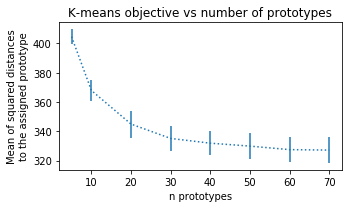

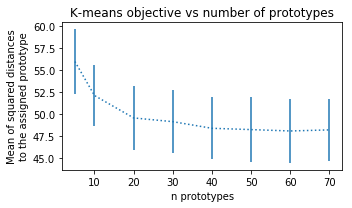

In [9]:
for i, normalize in enumerate(normalizers):
    plt.figure(figsize=(5,3))
    n_clusters, mean, std = out[i][0], out[i][1].mean(0), out[i][1].std(0)
    plt.errorbar(n_clusters, mean, std, linestyle=':')
    plt.title('K-means objective vs number of prototypes')
    plt.xlabel('n prototypes')
    plt.ylabel('Mean of squared distances\nto the assigned prototype')
    plt.tight_layout()

### MNIST train

In [10]:
# random_state=0
# dataset = 'mnist'
# train_size = 500
# N = n_classes = 10
# random_state=0

# dataset_obj = get_dataset(dataset, random_state)
# X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
# skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
# train, test = list(skf.split(X, y))[0]


# out = []

# for i, normalize in enumerate(normalizers):
#     o = plot_elbow_curve(
#         X[train], y[train], n_clusters=np.array([5] + list(range(10,80,10))),
#         cv=skf_cv, split='train', detailed_results=True, 
#         normalize=normalize, random_state=random_state,
#         plot=False)
#     out.append(o)
#     np.savetxt('scores_train_%s_%s_norm.csv' % (dataset, bool(normalize)),
#                o[1], delimiter=',')

In [11]:
# for i, normalize in enumerate(normalizers):
#     plt.figure(figsize=(5,3))
#     n_clusters, mean, std = out[i][0], out[i][1].mean(0), out[i][1].std(0)
#     plt.errorbar(n_clusters, mean, std, linestyle=':')
#     plt.title('K-means objective vs number of prototypes')
#     plt.xlabel('n prototypes')
#     plt.ylabel('Mean of squared distances\nto the assigned prototype')
#     plt.tight_layout()

## CIFAR10

In [12]:
random_state=0
dataset = 'cifar10'
train_size = 500
N = n_classes = 10
random_state=0

dataset_obj = get_dataset(dataset, random_state)
X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
train, test = list(skf.split(X, y))[0]

out = []

for i, normalize in enumerate(normalizers):
    o = plot_elbow_curve(
        X[train], y[train], n_clusters=np.array([5] + list(range(10,80,10))),
        cv=skf_cv, detailed_results=True, normalize=normalize, random_state=random_state,
        plot=False)
    out.append(o)
    np.savetxt('scores_val_%s_norm_%s.csv' % (dataset, bool(normalize)),
               o[1], delimiter=',')

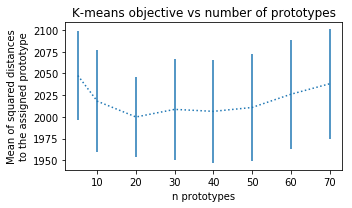

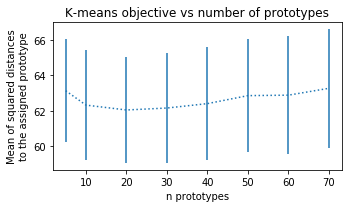

In [13]:
for i, normalize in enumerate(normalizers):
    plt.figure(figsize=(5,3))
    n_clusters, mean, std = out[i][0], out[i][1].mean(0), out[i][1].std(0)
    plt.errorbar(n_clusters, mean, std, linestyle=':')
    plt.title('K-means objective vs number of prototypes')
    plt.xlabel('n prototypes')
    plt.ylabel('Mean of squared distances\nto the assigned prototype')
    plt.tight_layout()

### Cifar10 train

In [14]:
# random_state=0
# dataset = 'cifar10'
# train_size = 500
# N = n_classes = 10
# random_state=0

# dataset_obj = get_dataset(dataset, random_state)
# X_imgs, X, y = dataset_obj.gen_data(N=N, plot=False)
# skf, skf_cv = dataset_obj.splitters(train_size=train_size, cv_repeats=5)
# train, test = list(skf.split(X, y))[0]


# out = []

# for i, normalize in enumerate(normalizers):
#     o = plot_elbow_curve(
#         X[train], y[train], n_clusters=np.array([5] + list(range(10,80,10))),
#         cv=skf_cv, split='train', detailed_results=True, 
#         normalize=normalize, random_state=random_state,
#         plot=False)
#     out.append(o)
#     np.savetxt('scores_train_%s_%s_norm.csv' % (dataset, bool(normalize)),
#                o[1], delimiter=',')

In [15]:
# for i, normalize in enumerate(normalizers):
#     plt.figure(figsize=(5,3))
#     n_clusters, mean, std = out[i][0], out[i][1].mean(0), out[i][1].std(0)
#     plt.errorbar(n_clusters, mean, std, linestyle=':')
#     plt.title('K-means objective vs number of prototypes')
#     plt.xlabel('n prototypes')
#     plt.ylabel('Mean of squared distances\nto the assigned prototype')
#     plt.tight_layout()

## Cifar - mnist

In [49]:
fig, axes = plt.subplots(2, 2, squeeze=False)
fig.set_size_inches(10,6)
fig.suptitle('K-means objective vs number of prototypes')
for j, dataset in enumerate(['mnist','cifar10']):
    axes[j,0].set_ylabel('Intra-cluster MSE')
    for i, normalize in enumerate(normalizers):
        scores = np.loadtxt('scores_val_%s_norm_%s.csv' % (dataset, bool(normalize)), delimiter=',')
        n_clusters, mean, std = np.array([5] + list(range(10,80,10))), scores.mean(0), scores.std(0)
        ax = axes[j,i]
        ax.errorbar(n_clusters, mean, std, linestyle=':')
        ax.set_title(dataset.capitalize()+
                     (' - [0,1] normalized' if normalize else ' - raw features'))
        ax.set_xlabel('n prototypes')
        #plt.ylabel('Mean of squared distances\nto the assigned prototype')
    plt.tight_layout(pad=3)
plt.savefig("./prototype_results/cifar10_mnist_elbow.pdf")